O Movimento Maio Amarelo nasce com uma só proposta: chamar a atenção da sociedade para o alto índice de mortes e feridos no trânsito em todo o mundo.

O objetivo do movimento é uma ação coordenada entre o Poder Público e a sociedade civil. A intenção é colocar em pauta o tema segurança viária e mobilizar toda a sociedade, envolvendo os mais diversos segmentos: órgãos de governos, empresas, entidades de classe, associações, federações e sociedade civil organizada para, fugindo das falácias cotidianas e costumeiras, efetivamente discutir o tema, engajar-se em ações e propagar o conhecimento, abordando toda a amplitude que a questão do trânsito exige, nas mais diferentes esferas.

In [5]:
# bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# mount Google Drive, captura da fonte de dados
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# importar fonte de dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/D02-2021-OCORRENCIA-ACIDENTES-TRANSITO.csv', sep=';', encoding='cp1252')

In [8]:
# Analisando formato do DataFrame
print("DataFrame: ",df.shape)
df.head(6)

DataFrame:  (36703, 30)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Dupla,Reta,Não,3,0,1,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,Com Vítimas Feridas,Plena Noite,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,Sem Vítimas,Plena Noite,Crescente,Nublado,Dupla,Reta,Sim,1,0,0,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,Com Vítimas Feridas,Plena Noite,Crescente,Nublado,Múltipla,Curva,Sim,3,0,2,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Chuva,Múltipla,Desvio Temporário,Sim,2,0,0,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01
5,331702,2021-01-01,sexta-feira,01:20:00,BA,116.0,0,VITORIA DA CONQUISTA,Velocidade Incompatível,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Simples,Viaduto,Sim,2,0,1,0,1,0,1,1,"-14,82741339","-40,82885465",SR-BA,UOP01,DEL08


In [9]:
# Limpeza dos dados
def remove_features(lista_features):
    for i in lista_features:
        df.drop(i,axis=1,inplace=True)
remove_features(['classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'regional','delegacia','uop' ])

In [10]:
# Verificando a quantidade de valores nulos no dataframe.
df.isnull().sum().sort_values(ascending=False)

br                103
km                103
longitude           0
latitude            0
data_inversa        0
dia_semana          0
horario             0
uf                  0
municipio           0
causa_acidente      0
tipo_acidente       0
pessoas             0
mortos              0
feridos_leves       0
feridos_graves      0
ilesos              0
ignorados           0
feridos             0
veiculos            0
id                  0
dtype: int64

In [11]:
# Visualização 
print("DataFrame: ",df.shape)
df.head(6)

DataFrame:  (36703, 20)


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,3,0,1,0,2,0,1,2,"-28,43029392","-48,84925073"
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,2,0,2,0,0,0,2,1,"-23,46634923","-51,82808011"
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,1,0,0,0,1,0,0,1,"-23,03412614","-45,5526999"
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,3,0,2,0,1,0,2,2,"-26,83955734","-48,71418074"
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,2,0,0,1,1,0,1,2,"-7,86521297","-34,90715176"
5,331702,2021-01-01,sexta-feira,01:20:00,BA,116.0,0,VITORIA DA CONQUISTA,Velocidade Incompatível,Saída de leito carroçável,2,0,1,0,1,0,1,1,"-14,82741339","-40,82885465"


In [12]:
# Vamos analisar algumas informações estatísticas das colunas que são numéricas e categóricas. Essas informações serão importantes ao longo da análise.
# Variáveis numéricas:
df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,36703.000000,36600.000000,36703.000000,36703.000000,36703.000000,36703.000000,36703.000000,36703.000000,36703.000000,36703.000000
mean,353461.370787,209.949344,2.305970,0.081465,0.833937,0.266954,0.968776,0.154837,1.100891,1.657957
std,12373.113623,130.686972,1.621187,0.327995,0.946887,0.586350,1.311039,0.422420,1.033041,0.721242
min,331693.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,342813.500000,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,353524.000000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,364201.500000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,378715.000000,495.000000,57.000000,19.000000,34.000000,23.000000,53.000000,8.000000,36.000000,14.000000


In [13]:
# Variáveis categóricas:
df.describe(include=['O'])

,data_inversa,dia_semana,horario,uf,km,municipio,causa_acidente,tipo_acidente,latitude,longitude
count,36703,36703,36703,36703,36600,36703,36703,36703,36703,36703
unique,212,7,1146,27,6622,1706,70,17,22216,22223
top,2021-07-11,sábado,19:00:00,MG,5,BRASILIA,Velocidade Incompatível,Colisão traseira,"-3,76999035","-38,67006282"
freq,263,6278,540,4708,156,558,4026,7097,59,59


In [14]:
# Tipos de dados
df.dtypes

id                  int64
data_inversa       object
dia_semana         object
horario            object
uf                 object
br                float64
km                 object
municipio          object
causa_acidente     object
tipo_acidente      object
pessoas             int64
mortos              int64
feridos_leves       int64
feridos_graves      int64
ilesos              int64
ignorados           int64
feridos             int64
veiculos            int64
latitude           object
longitude          object
dtype: object

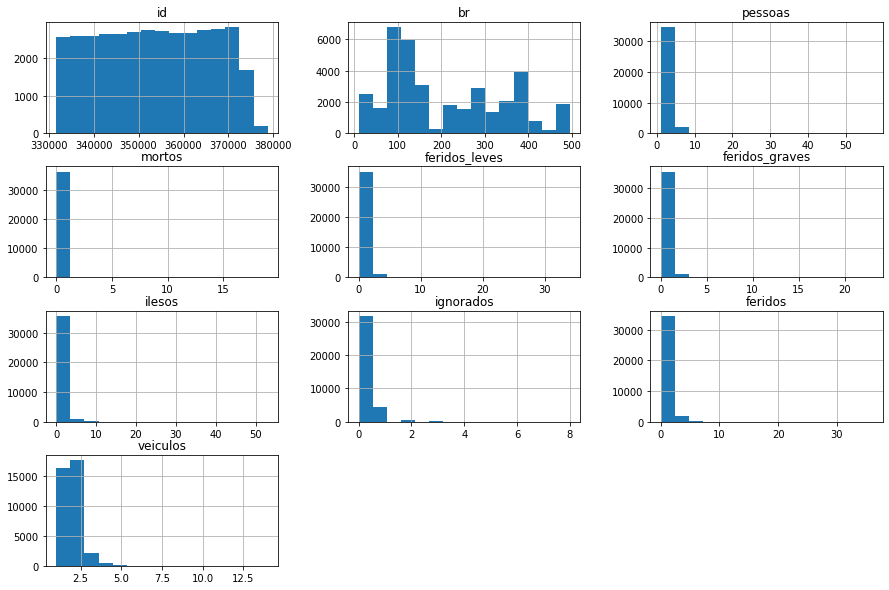

In [15]:
# plotar o histograma das variaveis
df.hist(bins=15, figsize=(15,10));

In [16]:
# quantidade de acidentes por UF
df.groupby('uf')['feridos'].sum()

uf
AC     183
AL     334
AM      70
AP     137
BA    2245
CE     894
DF     598
ES    1804
GO    1986
MA     712
MG    5563
MS    1010
MT    1358
PA     587
PB     869
PE    1502
PI     635
PR    4363
RJ    2846
RN     803
RO     825
RR     159
RS    2839
SC    5053
SE     331
SP    2403
TO     297
Name: feridos, dtype: int64

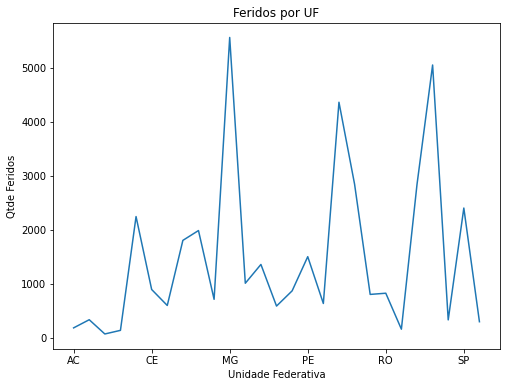

In [31]:
# Gráfico número de feridos por UF
df.groupby('uf')['feridos'].sum()


fig, ax = plt.subplots(figsize=(8,6))
df.groupby('uf')['feridos'].sum().plot.line(ax=ax)
plt.title('Feridos por UF')
plt.xlabel('Unidade Federativa')
plt.ylabel('Qtde Feridos');

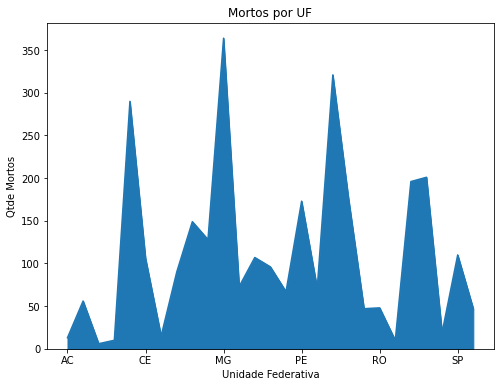

In [62]:
# Gráfico número de mortos por UF
df.groupby('uf')['feridos'].sum()


fig, ax = plt.subplots(figsize=(8,6))
df.groupby('uf')['mortos'].sum().plot.area(ax=ax)
plt.title('Mortos por UF')
plt.xlabel('Unidade Federativa')
plt.ylabel('Qtde Mortos');

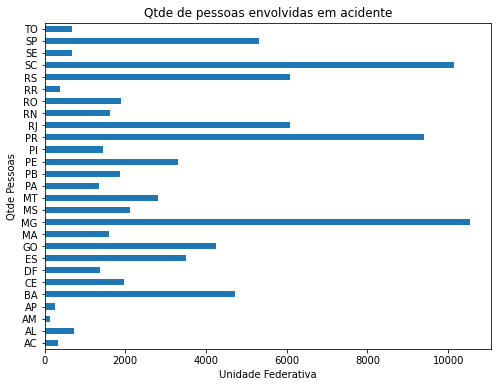

In [61]:
# Gráfico número de feridos por UF
df.groupby('uf')['pessoas'].sum()


fig, ax = plt.subplots(figsize=(8,6))
df.groupby('uf')['pessoas'].sum().plot.barh(ax=ax)
plt.title('Qtde de pessoas envolvidas em acidente')
plt.xlabel('Unidade Federativa')
plt.ylabel('Qtde Pessoas');

In [18]:
# Salvando o Dataframe:
# Gerando um novo arquivo
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset/D02-2021-OCORRENCIA-ACIDENTES-TRANSITO-rev01.csv', sep=';', index=False, encoding='cp1252')